In [387]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
%matplotlib inline

In [388]:
l = pd.read_csv("learning_loss.csv",header=1)
df = pd.read_csv("game_history.csv",header=5)

In [389]:
with open('learning_loss.csv') as f:
    for i in range(1):
        print(f.readline(),end='')

print("Loss history len:",len(l))
print("")
with open('game_history.csv') as f:
    for i in range(5):
        print(f.readline(),end='')

print("Game history len:",len(df))
print("Full games: ",df['game_over'].sum())


RL Brain - Loss file -  2018/12/31 14:01:18
Loss history len: 5

Arcade RL experiment - History file - 2018/12/31 14:01:16
learning_rate : 0.000010
epsilon : Adapt
max_memory : 5000
batch_size : 512
Game history len: 392
Full games:  2.0


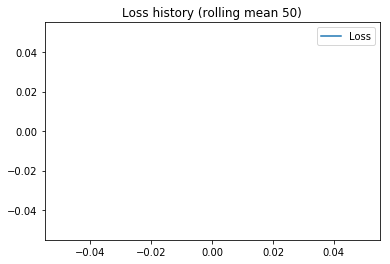

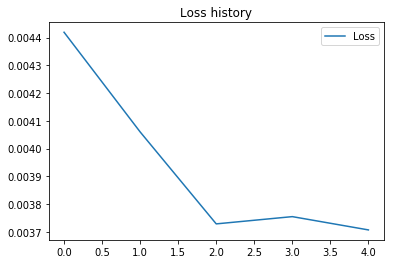

In [390]:
l.rolling(50).mean().plot(title="Loss history (rolling mean 50)")
l.plot(title="Loss history")


In [391]:
print("Final loss decay:\n",(1 - (l.max()  - l.tail(50).mean())/l.max()))

Final loss decay:
 Loss    0.890117
dtype: float64


In [392]:
df.head()

,timer,s0_player_x,s0_player_y,s0_coins,s0_coin_0_x,s0_coin_0_y,s0_balls,action,s1_player_x,s1_player_y,s1_coins,s1_coin_0_x,s1_coin_0_y,s1_balls,game_over,reward
0,1.0,0.386667,0.236667,1.0,0.5,0.5,0.0,8.0,0.353333,0.270000,1.0,0.5,0.5,0.0,0.0,-0.0005
1,2.0,0.353333,0.270000,1.0,0.5,0.5,0.0,6.0,0.320000,0.236667,1.0,0.5,0.5,0.0,0.0,-0.0005
2,3.0,0.320000,0.236667,1.0,0.5,0.5,0.0,1.0,0.320000,0.270000,1.0,0.5,0.5,0.0,0.0,-0.0005
3,4.0,0.320000,0.270000,1.0,0.5,0.5,0.0,1.0,0.320000,0.303333,1.0,0.5,0.5,0.0,0.0,-0.0005
4,5.0,0.320000,0.303333,1.0,0.5,0.5,0.0,4.0,0.353333,0.270000,1.0,0.5,0.5,0.0,0.0,-0.0005


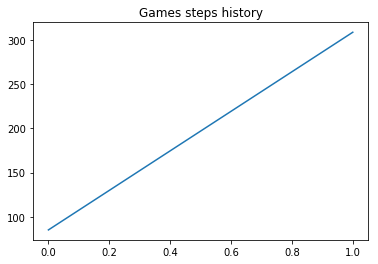

In [393]:
l_games = [-1]
l_games.extend(list(df[df['game_over']>0].index))
plt.plot([(l_games[p+1]-l_games[p]+1) for p in range(len(l_games)-1)])
plt.title("Games steps history")
plt.show()

C:\Users\emamorc\AppData\Local\conda\conda\envs\arcade\lib\site-packages\pandas\core\series.py:851: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


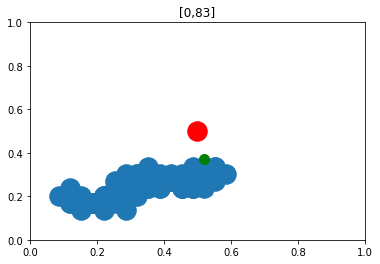

In [394]:
p=0

loc0,loc1 = l_games[p]+1,l_games[p+1]
my_title = "["+str(loc0)+","+str(loc1)+"]"
plt.scatter(np.array([df.loc[loc0:loc1]['s0_player_x']]),np.array([df.loc[loc0:loc1]['s0_player_y']]),s=380)
plt.scatter(np.array([df.loc[loc1]['s1_player_x'],]),np.array([df.loc[loc1]['s1_player_y']]),s=100,color='g')

xnames = ['s0_coin_{:d}_x'.format(i) for i in range(20)]
ynames = ['s0_coin_{:d}_y'.format(i) for i in range(20)]
plt.scatter(df.loc[loc0][xnames].values,df.loc[loc0][ynames].values,marker='o',color='r',s=380)
plt.title(my_title)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

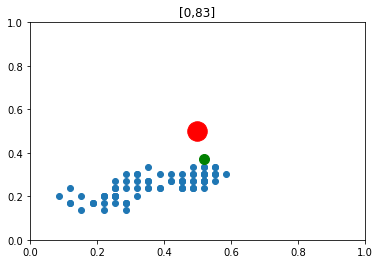

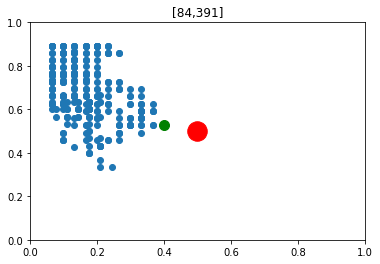

In [395]:

for p in range(len(l_games)-1):
    loc0,loc1 = l_games[p]+1,l_games[p+1]
    if(loc1>loc0):
        my_title = "["+str(loc0)+","+str(loc1)+"]"
        plt.scatter(np.array([df.loc[loc0:loc1]['s0_player_x']]),
        np.array([df.loc[loc0:loc1]['s0_player_y']]))
        plt.scatter(np.array([df.loc[loc1]['s1_player_x'],]),np.array([df.loc[loc1]['s1_player_y']]),s=100,color='g')
        xnames = ['s0_coin_{:d}_x'.format(i) for i in range(20)]
        ynames = ['s0_coin_{:d}_y'.format(i) for i in range(20)]
        plt.scatter(df.loc[loc0][xnames].values,df.loc[loc0][ynames].values,marker='o',color='r',s=380)
        plt.title(my_title)
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.show()


In [396]:
df[df['game_over']>0]

,timer,s0_player_x,s0_player_y,s0_coins,s0_coin_0_x,s0_coin_0_y,s0_balls,action,s1_player_x,s1_player_y,s1_coins,s1_coin_0_x,s1_coin_0_y,s1_balls,game_over,reward
83,84.0,0.520000,0.336667,1.0,0.5,0.5,0.0,1.0,0.520000,0.370000,0.0,0.0,0.0,0.0,1.0,0.9995
391,308.0,0.365833,0.525833,1.0,0.5,0.5,0.0,3.0,0.399167,0.525833,0.0,0.0,0.0,0.0,1.0,0.9995


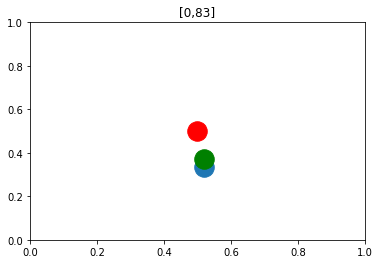

In [397]:
p=0

loc0,loc1 = l_games[p]+1,l_games[p+1]
my_title = "["+str(loc0)+","+str(loc1)+"]"
plt.scatter(np.array([df.loc[loc1]['s0_player_x'],]),np.array([df.loc[loc1]['s0_player_y']]),s=380)
plt.scatter(np.array([df.loc[loc1]['s1_player_x'],]),np.array([df.loc[loc1]['s1_player_y']]),s=380,color='g')
xnames = ['s0_coin_{:d}_x'.format(i) for i in range(20)]
ynames = ['s0_coin_{:d}_y'.format(i) for i in range(20)]
plt.scatter(df.loc[loc0][xnames].values,df.loc[loc0][ynames].values,marker='o',color='r',s=380)
plt.title(my_title)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [398]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model


In [399]:
model = load_model("model.h5")

In [400]:
MOVEMENT_SPEED = 0.05
def pick_dql_action(status_0):
    q_values = model.predict(np.matrix(status_0))
    action = np.argmax(q_values[0])
    action_encoder = { 0 : (0,0),\
                       1 : (0,1),\
                       2 : (1,1),\
                       3 : (1,0),\
                       4 : (1,-1),\
                       5 : (0,-1),\
                       6 : (-1,-1),\
                       7 : (-1,0),\
                       8:  (-1,1) }
    enc_action = action_encoder[action]
    change_x = MOVEMENT_SPEED * enc_action[0]
    change_y = MOVEMENT_SPEED * enc_action[1]
    return change_x,change_y


In [401]:
df.columns[1:7]

Index(['s0_player_x', 's0_player_y', 's0_coins', 's0_coin_0_x', 's0_coin_0_y',
       's0_balls'],
      dtype='object')

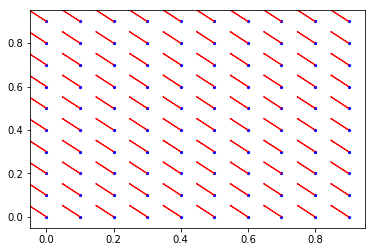

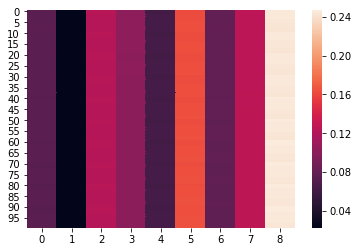

In [402]:
x_p = [p/400 for p in range(0,400,40)]
y_p = [p/400 for p in range(0,400,40)]

q = []

for x in x_p:
    for y in y_p:
        plt.scatter(x,y,s=5,color='b')
        status = np.array([x,y,1,0.5,0.5,0])
        q.append(model.predict(np.matrix(status))[0])
        dx,dy = pick_dql_action(status)
        plt.arrow(x,y,dx,dy,color='r')

plt.show()
sns.heatmap(pd.DataFrame(q))

In [403]:
df_in = pd.read_csv('00in.txt',header=None)
df_in.head()

,0,1,2,3,4,5
0,0.286667,0.303333,1.0,0.5,0.5,0.0
1,0.065833,0.892500,1.0,0.5,0.5,0.0
2,0.453333,0.270000,1.0,0.5,0.5,0.0
3,0.165833,0.459167,1.0,0.5,0.5,0.0
4,0.132500,0.866667,1.0,0.5,0.5,0.0


In [404]:
df_target = pd.read_csv('00target.txt',header=None)
df_target.head()

,0,1,2,3,4,5,6,7,8
0,0.075423,0.022718,0.123087,0.219838,0.063017,0.163444,0.078926,0.126609,0.244766
1,0.076137,0.217574,0.121978,0.102788,0.063620,0.164260,0.079602,0.126584,0.242304
2,0.075291,0.220032,0.123183,0.101613,0.062973,0.163549,0.078696,0.126781,0.245156
3,0.075648,0.022705,0.122780,0.102361,0.063180,0.163598,0.219169,0.126533,0.244011
4,0.076070,0.022742,0.217717,0.102624,0.063591,0.164282,0.079501,0.126649,0.242502


In [382]:
for n in range(len(df_target)):
    df_target.iloc[n,random.randrange(8)]=0.999

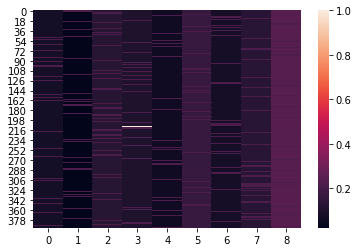

In [405]:
sns.heatmap(df_target)

In [414]:
train_in = []
train_target = []

for i in range(1000):
    x,y = random.random(),random.random()
    if (x<0.5) and (y<0.5):
        action = 2
    elif (x<0.5) and (y>=0.5):
        action = 4
    elif (x>0.5) and (y>=0.5):
        action = 6
    else:
        action = 8
    train_in.append(np.array([x,y,1,0.5,0.5,0]))
    _target =  np.random.rand(9)/10
    _target[action] = 0.9995
    train_target.append(_target)
    
    

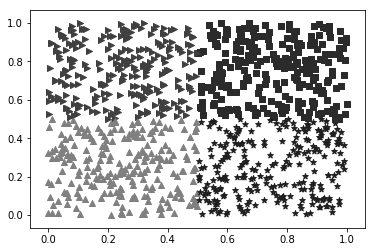

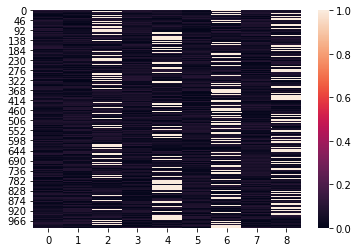

In [424]:
markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
for i in range(len(train_in)):
    action = np.argmax(train_target[i])
    plt.scatter(train_in[i][0],train_in[i][1],color="{:3.2f}".format(1/action),marker=markers[action])

plt.show()
sns.heatmap(pd.DataFrame(train_target))

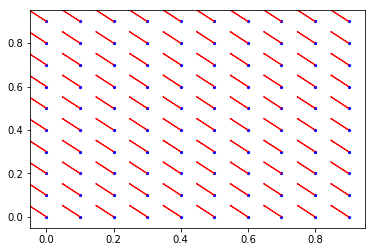

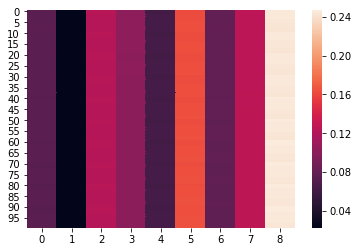

In [425]:
model = load_model("model.h5")

x_p = [p/400 for p in range(0,400,40)]
y_p = [p/400 for p in range(0,400,40)]

q = []
for x in x_p:
    for y in y_p:
        plt.scatter(x,y,s=5,color='b')
        status = np.array([x,y,1,0.5,0.5,0])
        q.append(model.predict(np.matrix(status))[0])
        dx,dy = pick_dql_action(status)
        plt.arrow(x,y,dx,dy,color='r')

plt.show()
sns.heatmap(pd.DataFrame(q))

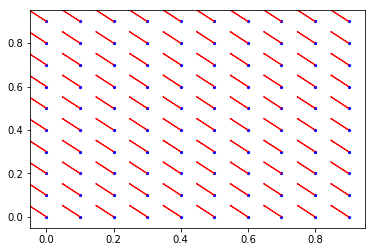

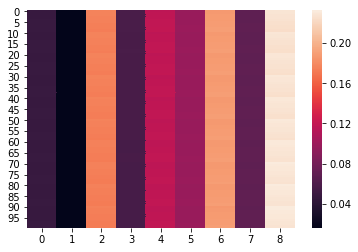

In [430]:
for i in range(500):
    model.train_on_batch(np.array(train_in),np.array(train_target))
    

q = []

for x in x_p:
    for y in y_p:
        plt.scatter(x,y,s=5,color='b')
        status = np.array([x,y,1,0.5,0.5,0])
        q.append(model.predict(np.matrix(status))[0])
        dx,dy = pick_dql_action(status)
        plt.arrow(x,y,dx,dy,color='r')

plt.show()
sns.heatmap(pd.DataFrame(q))

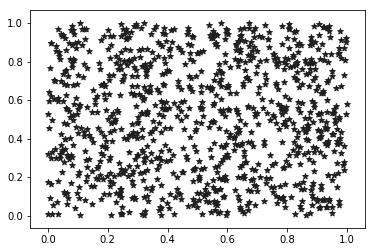

In [448]:
markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
for i in range(len(train_in)):
    status = train_in[i]
    action = np.argmax(model.predict(np.matrix(status))[0])
    plt.scatter(train_in[i][0],train_in[i][1],color="{:3.2f}".format(1/action),marker=markers[action])

plt.show()

In [449]:
from sklearn import linear_model


In [446]:
np.array(train_in)[:,:2]

array([[0.60010581, 0.01764928],
       [0.08043156, 0.79060062],
       [0.92134183, 0.63825006],
       ...,
       [0.10327832, 0.14785519],
       [0.17136169, 0.79308955],
       [0.57168514, 0.69475635]])

In [453]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(np.array(train_in),np.array(train_target))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

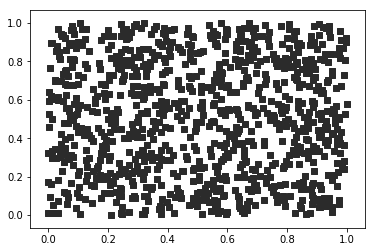

In [454]:
markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
for i in range(len(train_in)):
    status = train_in[i]
    action = np.argmax(clf.predict(np.matrix(status))[0])
    plt.scatter(train_in[i][0],train_in[i][1],color="{:3.2f}".format(1/action),marker=markers[action])

plt.show()

In [438]:
status

array([0.9, 0.9, 1. , 0.5, 0.5, 0. ])

matrix([[0.9, 0.9, 1. , 0.5, 0.5, 0. ]])

In [442]:
clf.predict(np.matrix(status))[0]

array([0.04866898, 0.05089468, 0.2724203 , 0.04948819, 0.2892153 ,
       0.05000114, 0.29983741, 0.05069507, 0.2892996 ])